# <center>Plataforma financiera BRCP </center>

análisis del tipo de cambio y el mercado inmobiliario puede requerir considerar otros factores como la inflación, tasas de interés, perspectivas económicas y legales, entre otros.

Inflacion
((IPC año de estudio - IPC del año anterior )/ ipc delmaño anterior )*100

In [1]:

#https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN38705PM/html
#PN38705PM: Índice de precios Lima Metropolitana (índice Dic.2021 = 100) 
#PN01255PM: Tipo de cambio nominal (S/ por canasta) - Promedio (var% mensual)

url_base="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
cod_ser="PN38705PM"
formato="/json"
url=url_base+cod_ser+formato
print(url)

#per="/2005-1/2019-12"
#url=url_base+cod_ser+formato+per

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN38705PM/json


In [2]:
import requests
import json
response=requests.get(url)
data=response.json()
json_str = json.dumps(data, indent=4)
print(json_str)

{
    "config": {
        "title": "\u00cdndice de precios Lima Metropolitana (\u00edndice Dic.2021 = 100)",
        "series": [
            {
                "name": "\u00cdndice de precios Lima Metropolitana (\u00edndice Dic.2021 = 100) - \u00cdndice de Precios al Consumidor (IPC)",
                "dec": "2"
            }
        ]
    },
    "periods": [
        {
            "name": "Jun.2021",
            "values": [
                "95.9814390796482"
            ]
        },
        {
            "name": "Jul.2021",
            "values": [
                "96.948489573628"
            ]
        },
        {
            "name": "Ago.2021",
            "values": [
                "97.9033694822447"
            ]
        },
        {
            "name": "Sep.2021",
            "values": [
                "98.2953966184284"
            ]
        },
        {
            "name": "Oct.2021",
            "values": [
                "98.8691125131803"
            ]
        },
        {


In [3]:
response_json=response.json()
print(response_json) 


{'config': {'title': 'Índice de precios Lima Metropolitana (índice Dic.2021 = 100)', 'series': [{'name': 'Índice de precios Lima Metropolitana (índice Dic.2021 = 100) - Índice de Precios al Consumidor (IPC)', 'dec': '2'}]}, 'periods': [{'name': 'Jun.2021', 'values': ['95.9814390796482']}, {'name': 'Jul.2021', 'values': ['96.948489573628']}, {'name': 'Ago.2021', 'values': ['97.9033694822447']}, {'name': 'Sep.2021', 'values': ['98.2953966184284']}, {'name': 'Oct.2021', 'values': ['98.8691125131803']}, {'name': 'Nov.2021', 'values': ['99.2232454403164']}, {'name': 'Dic.2021', 'values': ['100']}, {'name': 'Ene.2022', 'values': ['100.037268']}, {'name': 'Feb.2022', 'values': ['100.34884']}, {'name': 'Mar.2022', 'values': ['101.836672']}, {'name': 'Abr.2022', 'values': ['102.816232']}, {'name': 'May.2022', 'values': ['103.211072']}, {'name': 'Jun.2022', 'values': ['104.439931']}, {'name': 'Jul.2022', 'values': ['105.422597']}, {'name': 'Ago.2022', 'values': ['106.125283']}, {'name': 'Sep.202

In [4]:
for key in response_json.keys():
    print(key)

config
periods


In [5]:
print(response_json['config'])

{'title': 'Índice de precios Lima Metropolitana (índice Dic.2021 = 100)', 'series': [{'name': 'Índice de precios Lima Metropolitana (índice Dic.2021 = 100) - Índice de Precios al Consumidor (IPC)', 'dec': '2'}]}


In [6]:
print(response_json['periods'])

[{'name': 'Jun.2021', 'values': ['95.9814390796482']}, {'name': 'Jul.2021', 'values': ['96.948489573628']}, {'name': 'Ago.2021', 'values': ['97.9033694822447']}, {'name': 'Sep.2021', 'values': ['98.2953966184284']}, {'name': 'Oct.2021', 'values': ['98.8691125131803']}, {'name': 'Nov.2021', 'values': ['99.2232454403164']}, {'name': 'Dic.2021', 'values': ['100']}, {'name': 'Ene.2022', 'values': ['100.037268']}, {'name': 'Feb.2022', 'values': ['100.34884']}, {'name': 'Mar.2022', 'values': ['101.836672']}, {'name': 'Abr.2022', 'values': ['102.816232']}, {'name': 'May.2022', 'values': ['103.211072']}, {'name': 'Jun.2022', 'values': ['104.439931']}, {'name': 'Jul.2022', 'values': ['105.422597']}, {'name': 'Ago.2022', 'values': ['106.125283']}, {'name': 'Sep.2022', 'values': ['106.679849']}, {'name': 'Oct.2022', 'values': ['107.050724']}, {'name': 'Nov.2022', 'values': ['107.604861']}, {'name': 'Dic.2022', 'values': ['108.459162']}, {'name': 'Ene.2023', 'values': ['108.704764']}, {'name': 'Fe

In [7]:
print(response_json['periods'][0])

{'name': 'Jun.2021', 'values': ['95.9814390796482']}


In [8]:
print(response_json['periods'][0]["values"])

['95.9814390796482']


In [9]:
#print(response_json.get("periods"))  #el método get me da un resultado parecido a response_json['periods']
periodos=response_json.get("periods")
price_index=[]
for i in periodos:
    valores_list=i['values']
    for w in valores_list:
        w=float(w)
        price_index.append(w)
    
#print(type(price_index[0]))
print(price_index)

[95.9814390796482, 96.948489573628, 97.9033694822447, 98.2953966184284, 98.8691125131803, 99.2232454403164, 100.0, 100.037268, 100.34884, 101.836672, 102.816232, 103.211072, 104.439931, 105.422597, 106.125283, 106.679849, 107.050724, 107.604861, 108.459162, 108.704764, 109.024924, 110.391537, 111.005592, 111.358436]


In [10]:
fechas=[]
for i in periodos:
    nombres=i['name']
    fechas.append(nombres)
    
print(fechas)

['Jun.2021', 'Jul.2021', 'Ago.2021', 'Sep.2021', 'Oct.2021', 'Nov.2021', 'Dic.2021', 'Ene.2022', 'Feb.2022', 'Mar.2022', 'Abr.2022', 'May.2022', 'Jun.2022', 'Jul.2022', 'Ago.2022', 'Sep.2022', 'Oct.2022', 'Nov.2022', 'Dic.2022', 'Ene.2023', 'Feb.2023', 'Mar.2023', 'Abr.2023', 'May.2023']


In [11]:
import pandas as pd

In [12]:
diccionario= {"Fechas":fechas, "Valores":price_index}
print(diccionario)

{'Fechas': ['Jun.2021', 'Jul.2021', 'Ago.2021', 'Sep.2021', 'Oct.2021', 'Nov.2021', 'Dic.2021', 'Ene.2022', 'Feb.2022', 'Mar.2022', 'Abr.2022', 'May.2022', 'Jun.2022', 'Jul.2022', 'Ago.2022', 'Sep.2022', 'Oct.2022', 'Nov.2022', 'Dic.2022', 'Ene.2023', 'Feb.2023', 'Mar.2023', 'Abr.2023', 'May.2023'], 'Valores': [95.9814390796482, 96.948489573628, 97.9033694822447, 98.2953966184284, 98.8691125131803, 99.2232454403164, 100.0, 100.037268, 100.34884, 101.836672, 102.816232, 103.211072, 104.439931, 105.422597, 106.125283, 106.679849, 107.050724, 107.604861, 108.459162, 108.704764, 109.024924, 110.391537, 111.005592, 111.358436]}


In [13]:
df = pd.DataFrame(diccionario)
df

,Fechas,Valores
0,Jun.2021,95.981439
1,Jul.2021,96.948490
2,Ago.2021,97.903369
3,Sep.2021,98.295397
4,Oct.2021,98.869113
5,Nov.2021,99.223245
6,Dic.2021,100.000000
7,Ene.2022,100.037268
8,Feb.2022,100.348840
9,Mar.2022,101.836672


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hamnah Miranda\AppData\Local\Temp\ipykernel_12628\163257914.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Valores'])


Text(0.5, 1.0, 'Distribución deL IPC')

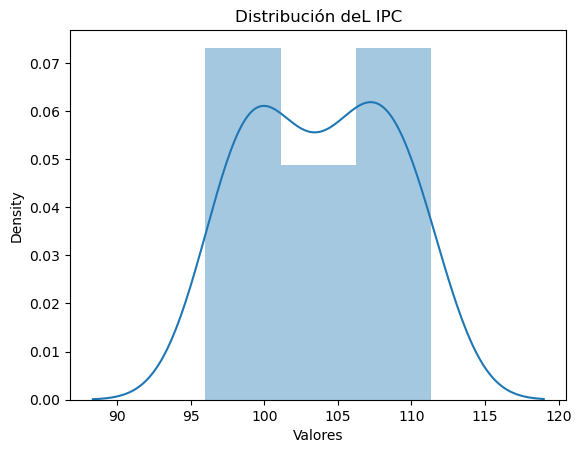

In [15]:
sns.distplot(df['Valores'])
plt.title('Distribución deL IPC')

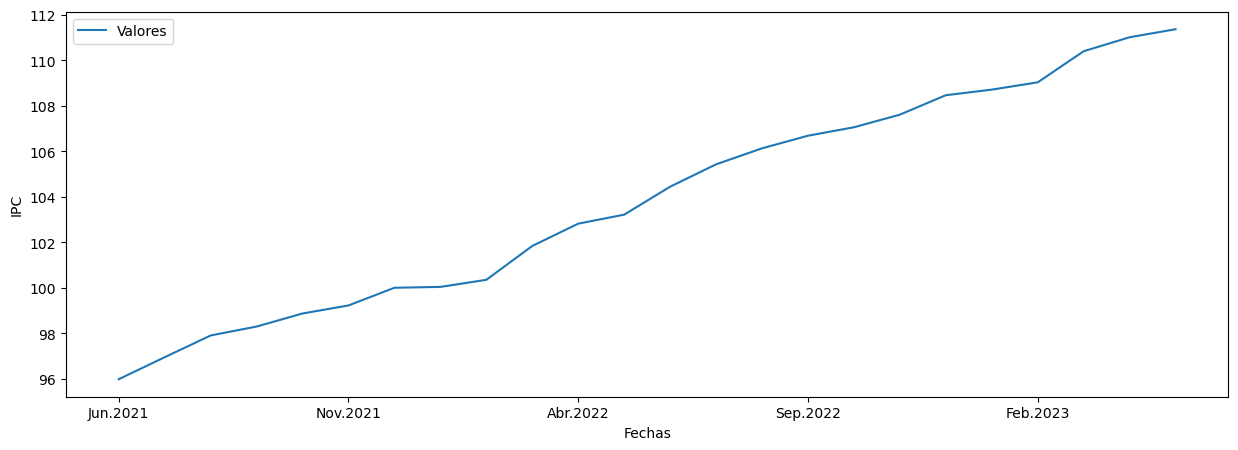

In [16]:
df.plot(x ='Fechas', y='Valores', figsize=(15, 5), kind = 'line')
plt.xlabel("Fechas")
plt.ylabel("IPC")
plt.show()